<a href="https://colab.research.google.com/github/kniJanjaras/229352-StatisticalLearning/blob/main/Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [ ]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

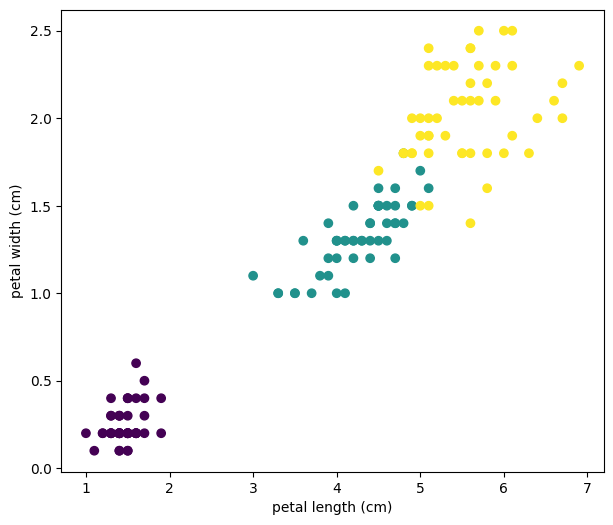

In [ ]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [ ]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.


In [ ]:
#TODO

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Shape of X_train: (120, 2)
Shape of X_test: (30, 2)
Shape of y_train: (120,)
Shape of y_test: (30,)


#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

C = 0.01
Training accuracy: 0.75
Test accuracy: 0.7333333333333333


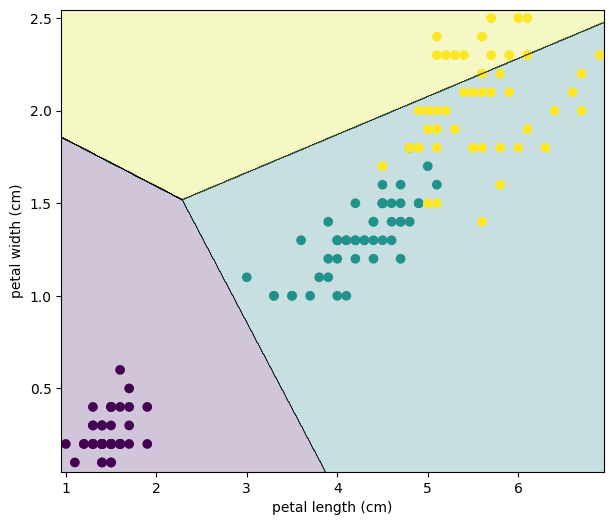

C = 0.1
Training accuracy: 0.6583333333333333
Test accuracy: 0.7


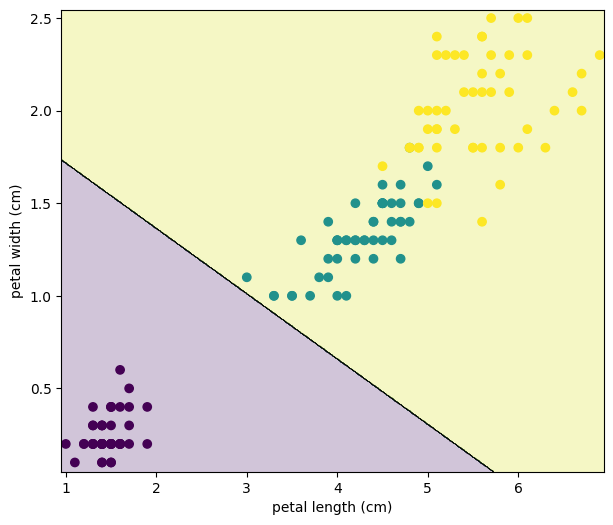

C = 1.0
Training accuracy: 0.7583333333333333
Test accuracy: 0.8333333333333334


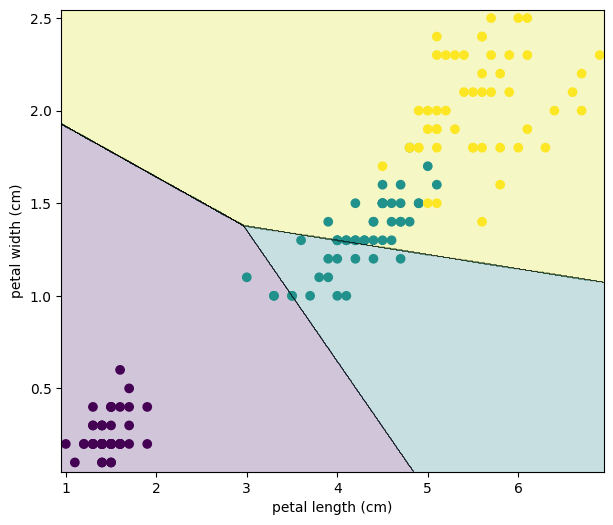

C = 10.0
Training accuracy: 0.9
Test accuracy: 0.8666666666666667


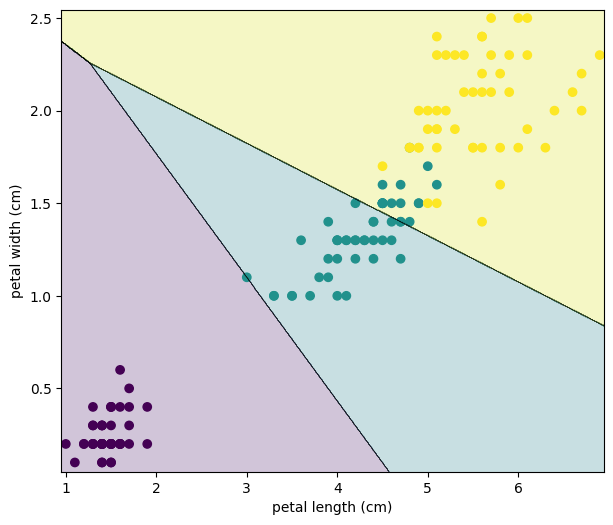

C = 100.0
Training accuracy: 0.9333333333333333
Test accuracy: 0.9666666666666667


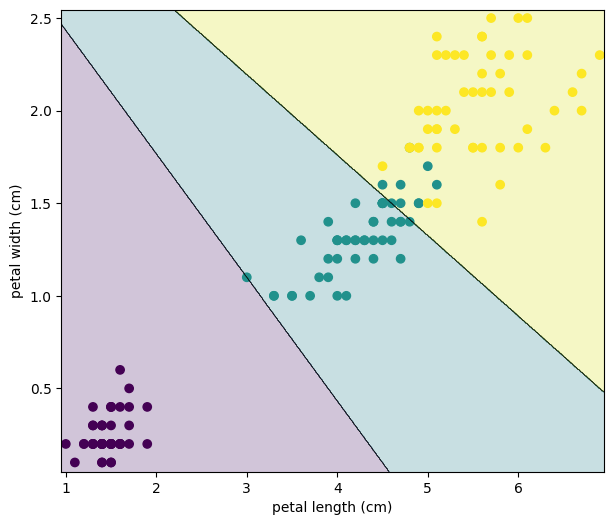

In [ ]:
#TODO
for C in [0.01, 0.1, 1.0, 10.0, 100.0]:
    linear_svc = LinearSVC(C=C, loss='hinge', max_iter=100000)
    linear_svc.fit(X_train, y_train)

    print(f"C = {C}")
    print(f"Training accuracy: {linear_svc.score(X_train, y_train)}")
    print(f"Test accuracy: {linear_svc.score(X_test, y_test)}")

    plot_decision_boundary(linear_svc, X, y)
    plt.show()

What is the effect of `C` on the decision boundary?

เมื่อค่าC มีค่าน้อยมากๆ จะทำให้การแบ่งกลุ่มผิดพลาด เสี่ยง underfitting แต่เมื่อcมีค่ามากๆ modelพยายาม จำแนกให้ถูกหมด จะเสี่ยงการเกิด overfitted

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [ ]:
#TODO
# when pick C = 100
linear_svc100 = LinearSVC(C=100.0, loss='hinge', max_iter=100000)
linear_svc100.fit(X_train, y_train)

test_accurac_svc100 = linear_svc100.score(X_test, y_test)

print(f"Test accuracy for LinearSVC with C=100.0: {test_accurac_svc100}")
print(f"Test error for LinearSVC with C=100.0: {1 - test_accurac_svc100}")

Test accuracy for LinearSVC with C=100.0: 0.9666666666666667
Test error for LinearSVC with C=100.0: 0.033333333333333326


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

In [ ]:
#TODO
svc = SVC(kernel='rbf', C=1.0, gamma=0.01)
svc.fit(X,y)

SVC(gamma=0.01)

Training SVC with gamma = 0.01
Training accuracy: 0.95
Test accuracy: 1.0


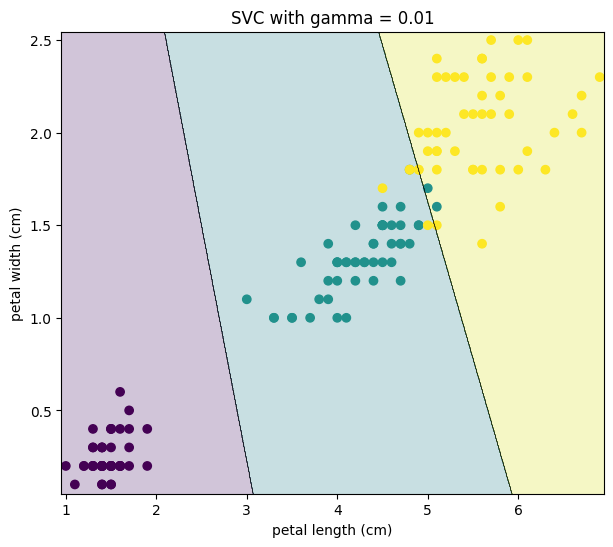

Training SVC with gamma = 0.1
Training accuracy: 0.9583333333333334
Test accuracy: 1.0


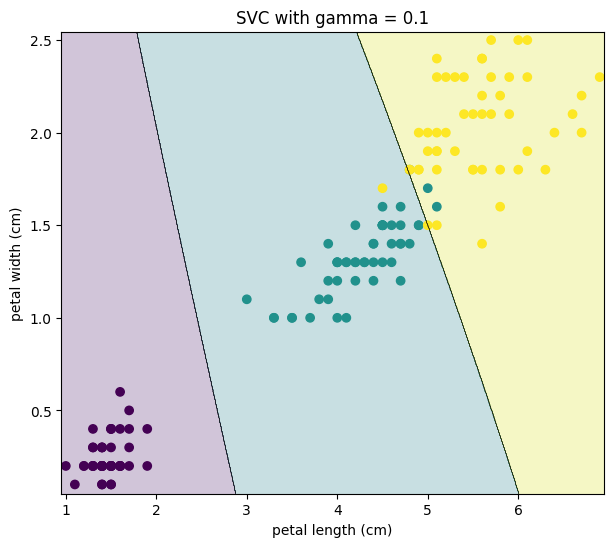

Training SVC with gamma = 1.0
Training accuracy: 0.9583333333333334
Test accuracy: 1.0


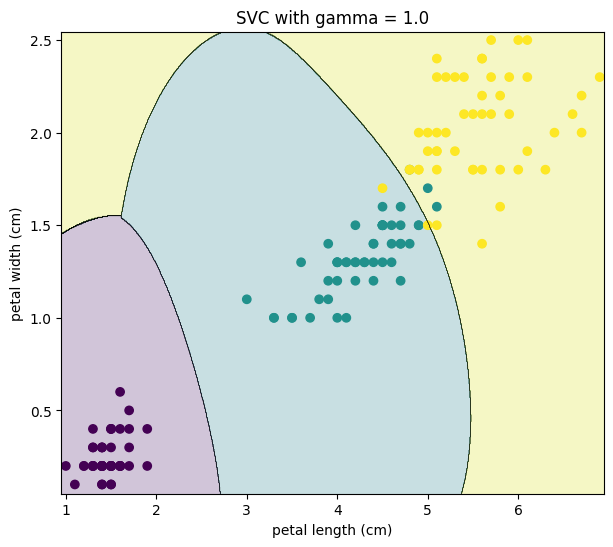

Training SVC with gamma = 10.0
Training accuracy: 0.9666666666666667
Test accuracy: 1.0


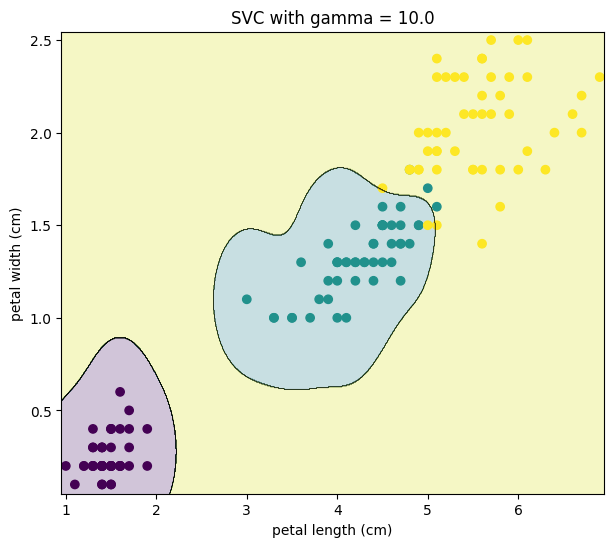

Training SVC with gamma = 100.0
Training accuracy: 0.9916666666666667
Test accuracy: 0.9333333333333333


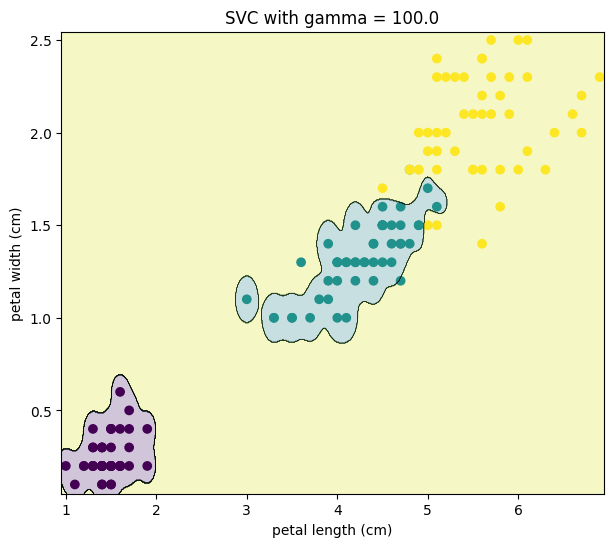

In [ ]:
#TODO
for gamma in [0.01, 0.1, 1.0, 10.0, 100.0]:
    print(f"Training SVC with gamma = {gamma}")
    svc = SVC(kernel='rbf', C=1.0, gamma=gamma)
    svc.fit(X_train, y_train)

    print(f"Training accuracy: {svc.score(X_train, y_train)}")
    print(f"Test accuracy: {svc.score(X_test, y_test)}")


    plot_decision_boundary(svc, X, y)
    plt.title(f'SVC with gamma = {gamma}')
    plt.show()

What is the effect of gamma on the decision boundary?

ans: gamma มากเส้นขอบจะแคบ หมาะกับข้อมูลที่ซับซ้อน แต่เสี่ยงจำ noise

  gamma น้อยเส้นขอบจะกว้าง  เหมาะกับข้อมูลที่ไม่ต้องการความละเอียดสูง



#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [ ]:
#TODO
#when Pick gamma = 100
svc100 = SVC(kernel='rbf', C=1.0, gamma=100)
svc100.fit(X_train, y_train)

test_accuracy100 = svc100.score(X_test, y_test)

print(f"Test accuracy for SVC with C=1 gamma=100: {test_accuracy100}")
print(f"Test error for SVC with C=1 gamma=100: {1 - test_accuracy100}")

Test accuracy for SVC with C=1 gamma=100: 0.9333333333333333
Test error for SVC with C=1 gamma=100: 0.06666666666666665


In [ ]:
# The number of support vectors for each class is stored in n_support_
support_vectors_per_class = svc100.n_support_
total_support_vectors = support_vectors_per_class.sum()

print(f"Number of support vectors per class: {support_vectors_per_class}")
print(f"Total number of support vectors: {total_support_vectors}")

Number of support vectors per class: [20 34 38]
Total number of support vectors: 92


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [ ]:
print(f"Test accuracy for LinearSVC with C=100.0: {test_accurac_svc100}")
print(f"Test accuracy for SVC with C=1 gamma=10.0: {svc.score(X_test, y_test)}")

Test accuracy for LinearSVC with C=100.0: 0.9666666666666667
Test accuracy for SVC with C=1 gamma=10.0: 0.9333333333333333


1.จากค่า accuracy

LinearSVC with C=100.0: 0.9666666666666667

SVC with C=1 gamma=10.0: 0.9333333333333333

LinearSVC สามารถจำแนกข้อมูล Iris ได้ดีกว่าในข้อมูลใหม่ที่โมเดลไม่เคยเห็น

2. จาก decision boundary plot

LinearSVC (ข้อมูลสามารถแยกด้วยเส้นตรงได้)

SVC (RBF Kernel, ตัดสินใจจะเป็นเส้นที่ โค้งและซับซ้อน)

ดังนั้น เส้นการตัดสินใจที่เรียบง่ายแต่แม่นยำ (จาก LinearSVC) มักเหมาะสมกับข้อมูล Iris มากกว่า